Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#### Load the automobile dataset 
automobile_df = pd.read_csv('automobile.txt')

In [23]:
# view first five rows
automobile_df.head() 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
# view last five rows
automobile_df.tail() 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [25]:
automobile_df.info() # to get the data types of each column and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1   normalized-losses   205 non-null    object 
 2   make                205 non-null    object 
 3   fuel-type           205 non-null    object 
 4   aspiration          205 non-null    object 
 5   num-of-doors        205 non-null    object 
 6   body-style          205 non-null    object 
 7   drive-wheels        205 non-null    object 
 8   engine-location     205 non-null    object 
 9   wheel-base          205 non-null    float64
 10  length              205 non-null    float64
 11  width               205 non-null    float64
 12  height              205 non-null    float64
 13  curb-weight         205 non-null    int64  
 14  engine-type         205 non-null    object 
 15  num-of-cylinders    205 non-null    object 
 16  engine-s

In [26]:
automobile_df.describe() # to get summary statistics for each numerical column

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [42]:
# get the number of missing data points per column
automobile_df.isnull().sum()

symboling             0
normalized-losses     0
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [43]:
# Code here
mobile_type = automobile_df.groupby('make')['price'].count()
mobile_type

KeyError: 'make'

In [44]:
# Convert data types if necessary
automobile_df['price'] = pd.to_numeric(automobile_df['price'], errors='coerce')

In [31]:
# Identify and correct erroneous data
automobile_df.loc[automobile_df['price'] < 0, 'price'] = np.nan

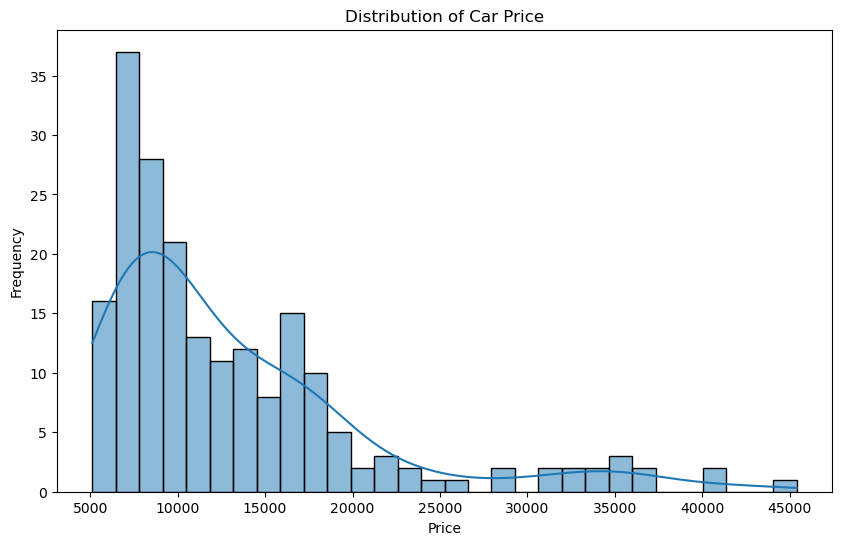

In [41]:
# Plot distributions
plt.figure(figsize=(10, 6))
sns.histplot(automobile_df['price'], bins=30, kde=True)
plt.title('Distribution of Car Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Scatter plot to explore relationships
plt.figure(figsize = (10, 6))
sns.scatterplot( data = automobile_df, x = 'horsepower', y = 'price')
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

ValueError: Could not interpret value `horsepower` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>